# D1 固定点

4.1節参照．

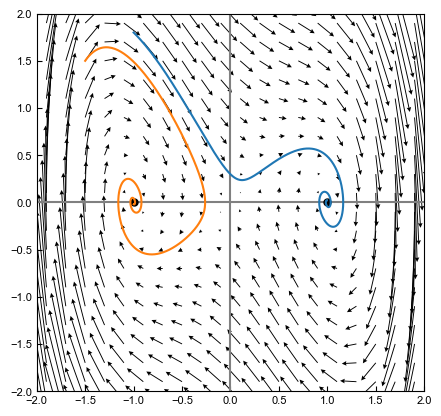

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def func(var, t):
    x = var[0]
    y = var[1]
    dxdt = y
    dydt = -(-2*x+2*x*x*x)-y
    
    return [dxdt, dydt]
    
plt.figure(figsize = (5, 5), dpi = 100)

xmin, xmax, ymin, ymax = -2.5, 2.5, -2.5, 2.5

# 軸をプロット
plt.plot([xmin, xmax], [0, 0], color = 'gray')
plt.plot([0, 0], [ymin,ymax], color = 'gray')

# 安定固定点をプロット
plt.plot(1,0,'o',color='black', markersize = 5)
plt.plot(-1,0,'o',color='black', markersize = 5)

# ベクトル場をプロット
gridwidth=0.2 # メッシュの間隔
X, Y = np.meshgrid(np.arange(xmin, xmax, gridwidth), np.arange(ymin, ymax, gridwidth))  # メッシュを刻む
U, V = func([X, Y], t) # 計算. tはダミー

plt.quiver(X, Y, U, V, scale = 45, headwidth = 5) # プロット．scaleの値が小さいほど矢印が長くなる．

# 時間発展させて，軌跡をプロット．
t = np.linspace(0.0, 10.0, 1000) # 時間
            
init = [-1, 1.8] # 初期値
result = odeint(func, init, t, args=()) # 微分方程式を解く
plt.plot(result[:,0], result[:,1], '-')

init = [-1.5, 1.5]
result = odeint(func, init, t, args=())
plt.plot(result[:,0], result[:,1], '-')

plt.xlim([-2, 2])
plt.ylim([-2, 2])
            
plt.show();

# D2 ファンデルポール型振動子

4.3節参照．

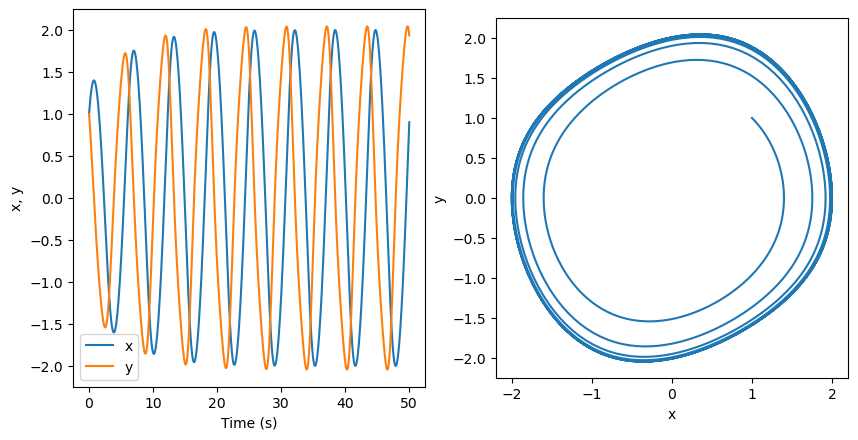

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def func(var, t):
    x, y = var
    dxdt = y
    dydt = -mu*(x*x-1)*y - x
    
    return [dxdt, dydt]

init = [1, 1]
N = 1000
t = np.linspace(0, 50, N)

mu = 0.2
r = odeint(func, init, t, args = ())

fig = plt.figure(figsize=(10,5), dpi=100)

ax1 = fig.add_subplot(121, xlabel = 'Time (s)', ylabel = 'x, y')
ax1.plot(t, r[:,0], label = 'x')
ax1.plot(t, r[:,1], label = 'y')
ax1.legend()

ax2 = fig.add_subplot(122, xlabel = 'x', ylabel = 'y', aspect = 'equal')
ax2.plot(r[:,0], r[:, 1])

plt.show()

# D3 チューリングパターン

4.6節参照．

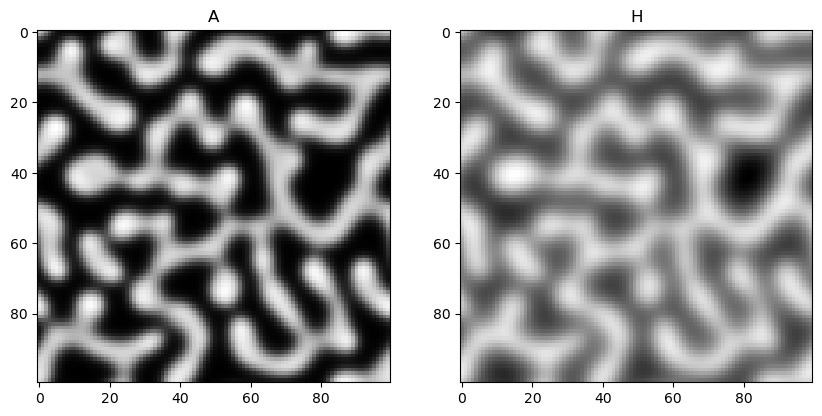

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 拡散項の計算
def diffusion(f, dx):
    return (-4 * f + np.roll(f,1,axis=0) + np.roll(f,-1,axis=0)+ np.roll(f,+1,axis=1) + np.roll(f,-1,axis=1)) / (dx*dx)

Da, Dh, ka, kh, d = 0.1, 5, 0.2, 0.4, 0.5

L = 100
dx, dt = 0.5, 0.01

# 初期値
a = 0.1*np.random.normal(size=(L, L))
h = 0.1*np.random.normal(size=(L, L))

# 時間発展
for i in range(5000):            
    da = dt * (ka*a*a/(1+a*a)/h-d*a + Da*diffusion(a, dx))
    dh = dt * (kh*a*a/(1+a*a)-d*h + Dh*diffusion(h, dx))
        
    a += da
    h += dh

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5), dpi = 100)
    
ax1.imshow(a, cmap='gray')
ax2.imshow(h, cmap='gray')
        
ax1.grid(b = False)
ax2.grid(b = False)
        
ax1.set_title("A")
ax2.set_title("H")

plt.show()

# D3 SIRモデル

感染症伝播のモデル．演習問題(4.3)を参照．
確率的な計算はF2を参照．

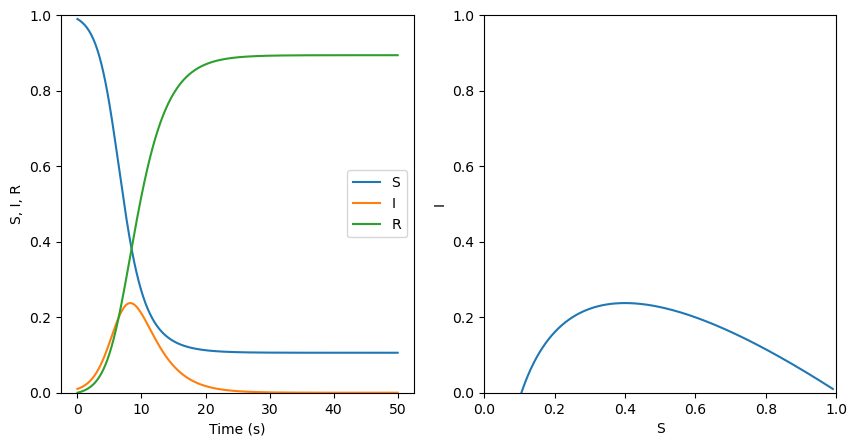

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

p = 1 # 感染率
q = 0.4 # 回復率

def func(var, t):
    S, I, R = var
    dSdt = -p*S*I
    dIdt = p*S*I - q*I
    dRdt = q*I    
    return [dSdt, dIdt, dRdt]

I0 = 0.01 # 感染者の初期値（最大1）
init = [1 - I0, I0, 0]
N = 1000
t = np.linspace(0, 50, N)

r = odeint(func, init, t, args = ())

fig = plt.figure(figsize = (10,5), dpi=100)

ax1 = fig.add_subplot(121, xlabel = 'Time (s)', ylabel = 'S, I, R')
ax1.plot(t, r[:,0], label = 'S')
ax1.plot(t, r[:,1], label = 'I')
ax1.plot(t, r[:,2], label = 'R')
ax1.set_ylim([0,1])
ax1.legend()

ax2 = fig.add_subplot(122, xlabel = 'S', ylabel = 'I')
ax2.plot(r[:,0], r[:, 1])
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])

plt.show()